## 1.数据导入与预处理

In [17]:
# 加载数据分析需要使用的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams['font.sans-serif'] = ['SimHei']
warnings.filterwarnings('ignore')

#数据加载和整合
# 加载零售数据集，使用'ISO-8859-1'编码方式
df_item = pd.read_csv('G:\上课文件\Python计算\数据作业\item-2018-06-01-2018-07-05.csv',encoding='ISO-8859-1')
df_item['SDATE'] = pd.to_datetime(df_item.SDATE,format='%Y-%m-%d')
df_item.head()
#数据大小
#print(df.shape)
#数据分布情况

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


In [18]:
df_basket = pd.read_csv('G:\上课文件\Python计算\数据作业\Basket-2018-06-01-2018-07-05.csv',encoding='ISO-8859-1')
df_basket['SHOP_DATETIME'] = pd.to_datetime(df_basket.SHOP_DATETIME,format='%Y-%m-%d')
df_basket.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.0
1,2018-06-01,D007,3,250200,32.7
2,2018-06-01,D007,1,161068,16.8
3,2018-06-01,D007,8,5325,30.4
4,2018-06-01,D007,8,5361,191.3


In [19]:
df_item.describe()

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06
mean,2.994959e+00,1.659824e+05,1.144861e+05,1.436702e+00,1.285536e+01,1.424412e+01,-1.624232e+00
std,2.470286e+00,8.583102e+04,8.161988e+04,7.015504e+00,1.022148e+02,2.403937e+01,5.160490e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,-6.000000e+02,-3.594000e+04,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.995200e+04,2.183500e+04,1.000000e+00,3.800000e+00,3.800000e+00,-1.000000e+00
50%,2.000000e+00,1.758280e+05,1.233210e+05,1.000000e+00,7.000000e+00,7.800000e+00,0.000000e+00
75%,3.000000e+00,2.229530e+05,1.959930e+05,1.000000e+00,1.200000e+01,1.500000e+01,0.000000e+00
max,2.000000e+01,3.239140e+05,2.250470e+05,4.020000e+03,6.912000e+04,1.980000e+03,9.300000e+02


从商品单价来看，平均值为13元，最小值为0元，中位数为7元，最大值为69120元，标准差为9.33，说明价格有一定的浮动。
折扣幅度来看，平均折扣为1.6元，中位数为0元，最大折扣为57600元，最小幅度为涨价226元。

In [20]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732761 entries, 0 to 1732760
Data columns (total 10 columns):
SDATE              datetime64[ns]
STORE_CODE         object
POSID              int64
BASK_CODE          int64
PROD_CODE          int64
ITEM_QUANTITY      float64
ITEM_SPEND         float64
NORMAL_PRICE       float64
DISCOUNT_TYPE      object
DISCOUNT_AMOUNT    float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 132.2+ MB


In [21]:
df_basket.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


从用户购买消费来看，平均值为39.58元，中位数为20元，最小值为0.01元，最大值为79920元。标准差为196，表明用户之间的消费差距浮动较大。在购买情况来看，服从长尾理论。

In [22]:
df_basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571552 entries, 0 to 571551
Data columns (total 5 columns):
SHOP_DATETIME    571552 non-null datetime64[ns]
STORE_CODE       571552 non-null object
POS_NO           571552 non-null int64
BASK_CODE        571552 non-null int64
BASK_SPEND       571552 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 21.8+ MB


In [23]:
df_item=df_item[df_item['ITEM_SPEND']>=0]#清除ITEM_SPEND小于0的值
df_basket=df_basket[df_basket['BASK_SPEND']>=0]

In [24]:
display(df_item.shape)
display(df_basket.shape)

(1730741, 10)

(569797, 5)

#### 通过数据导入以及描述统计以后，剔除异常值以后。
+ 从商品单价来看，平均值为13元，最小值为0元，中位数为7元，最大值为69120元，标准差为9.33，说明价格有一定的浮动。折扣幅度来看，平均折扣为1.6元，中位数为0元，最大折扣为57600元，最小幅度为涨价226元。
+ 从用户购买消费来看，平均值为39.58元，中位数为20元，最小值为0.01元，最大值为79920元。标准差为196，表明用户之间的消费差距浮动较大。在购买情况来看，服从长尾理论。

## 2.描述性统计

### 2.1 按日期销售分布
2.2.1 按自然日分布

In [25]:
# 整体销售情况子数据集，包含下单日期、销售额、销量、利润、年份、月份信息
sales_day = df_basket[['SHOP_DATETIME', 'BASK_SPEND']]
#按照年份、月份对销售子数据集进行分组求和
sales_day = sales_day.groupby(['SHOP_DATETIME']).sum()

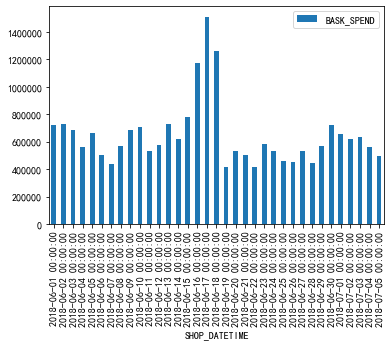

In [26]:
sales_day.plot(kind='bar')

从上图可以看出，消费金额8月16-18日达到了高峰。其中在8月17日，销售额达到了最大值，之后消费金额呈下降趋势，并不断趋于平稳的状态。

2.1.2 按工作日分布

In [27]:
df_basket['daynameofweek']=df_basket['SHOP_DATETIME'].dt.weekday_name

In [28]:
df_basket.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND,daynameofweek
0,2018-06-01,D007,3,250458,8.0,Friday
1,2018-06-01,D007,3,250200,32.7,Friday
2,2018-06-01,D007,1,161068,16.8,Friday
3,2018-06-01,D007,8,5325,30.4,Friday
4,2018-06-01,D007,8,5361,191.3,Friday


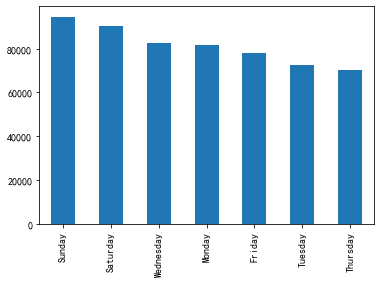

In [29]:
df_basket.daynameofweek.value_counts().plot(kind='bar')

通过对工作日销售笔数进行统计，可以看出周日周六为单数最大的两天。

### 2.2 按门店分布

In [30]:
storeId_count = df_basket.groupby('STORE_CODE').count()['BASK_SPEND'].sort_values(ascending=False)
print(storeId_count.head(10))

STORE_CODE
A001    66507
D002    62949
D007    37503
A008    36462
A013    30064
A006    28470
A012    24946
A009    21809
D004    21362
D008    21029
Name: BASK_SPEND, dtype: int64


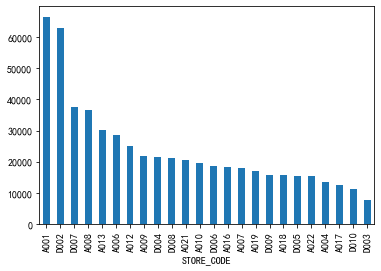

In [31]:
storeId_count.plot(kind='bar')

门店销售情况，平均店面销售额为939766，仅有A001,A008,A013,D002,D007达到均值以上，其中D003,D010,A017三个店铺距离均值差距较大，值得注意和警惕。

### 2.3 产品价格分布
2.3.1 产品价格分组分布

In [32]:
#  依据特征income创造收入人群称呼
prices = []
for price in df_item['ITEM_SPEND']:
    if 0 <= price < 20:
        prices.append(1)  #  1
    elif 20 <= price < 50:
        prices.append(2)  # 
    elif 50 <= price < 100:
        prices.append(3)  #
    elif 100 <= price < 500:
        prices.append(4)  #
    elif 500 <= price < 1000:
        prices.append(5)  #
    elif 1000 <= price < 2000:
        prices.append(6)  #
    elif 2000 <= price:
        prices.append(7)  #
        
df_item['price'] = pd.DataFrame(prices)

Text(0, 0.5, '价格')

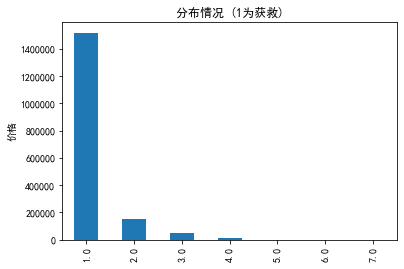

In [33]:
df_item.price.value_counts().plot(kind='bar')# 柱状图 
plt.title(u"分布情况 (1为获救)") # 标题
plt.ylabel(u"价格")  

{'whiskers': [<matplotlib.lines.Line2D at 0x22417c0ecc8>,
 'caps': [<matplotlib.lines.Line2D at 0x22417c13c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x22417c0e288>],
 'medians': [<matplotlib.lines.Line2D at 0x22417c19c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x22417c19d08>],
 'means': []}

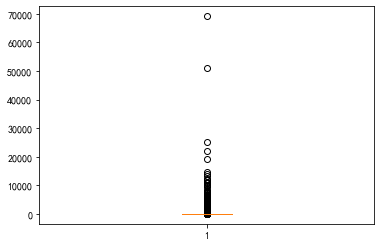

In [34]:
#使用 plt 的 .boxplot() 方法绘制箱线图
plt.figure()
plt.subplot()
plt.boxplot(df_item["ITEM_SPEND"])

2.3.2 产品折扣分布

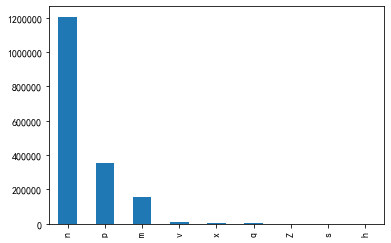

In [35]:
df_item.DISCOUNT_TYPE.value_counts().plot(kind='bar')

从商品价格分布可以看出，商品销售主要集中在100元以下商品，其中商品销售平均数量为9561，60元以下商品销售额达到均值以上，其余商品在均值以下。

#### 小结：
* 按照自然日统计销售金额，消费金额8月16-18日达到了高峰。其中在8月17日，销售额达到了最大值，之后消费金额呈下降趋势，并不断趋于平稳的状态。
* 根据图形可以看出周六周日销售量和销售额相当，平均单价也很接近分别为42.801和42.918，领先其他工作日销售情况。工作日中，紧邻周末的周一和周五销售情况最好，整个星期的消费情况呈现一个凹的造型。按日期分析销售情况可以看出六月16、17、18三天的销售情况异常突出，星期分别为星期六、星期日、星期一，可能又相关促销行动举行，可在商品分析时，进一步分析。
* 门店销售情况，平均店面销售额为939766，仅有A001,A008,A013,D002,D007达到均值以上，其中D003,D010,A017三个店铺距离均值差距较大，值得注意和警惕。
* 从商品价格分布可以看出，商品销售主要集中在100元以下商品，其中商品销售平均数量为9561，60元以下商品销售额达到均值以上，其余商品在均值以下。

# 2 用户行为分析

## 2.1 用户下单行为分析
###2.1.1 用户消费金额、消费次数的描述统计

In [36]:
# 客户消费分析
grouped_Customer = df_basket[['BASK_CODE','SHOP_DATETIME', 
          'BASK_SPEND']].sort_values(['SHOP_DATETIME']).groupby('BASK_CODE')
grouped_Customer.head()

,BASK_CODE,SHOP_DATETIME,BASK_SPEND
0,250458,2018-06-01,8.0
215288,250469,2018-06-01,89.7
215287,161017,2018-06-01,9.9
215286,161158,2018-06-01,4.0
215285,250476,2018-06-01,86.4
...,...,...,...
355739,124578,2018-07-05,23.4
355738,124587,2018-07-05,10.0
355737,141664,2018-07-05,149.8
355819,291779,2018-07-05,7.2


In [37]:
# 用户消费金额、消费次数的描述统计(在此为平均每个用户平均消费金额，不是每笔平均消费金额)
grouped_Customer.count().describe()

,SHOP_DATETIME,BASK_SPEND
count,280816.000000,280816.000000
mean,2.029076,2.029076
std,1.077605,1.077605
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,7.000000,7.000000


In [38]:
grouped_Customer['BASK_SPEND'].sum().describe()

count    280816.000000
mean         80.317314
std         282.972947
min           0.010000
25%          20.700000
50%          48.940000
75%          98.700000
max       80064.900000
Name: BASK_SPEND, dtype: float64

### 2.1.2 用户消费金额分布图

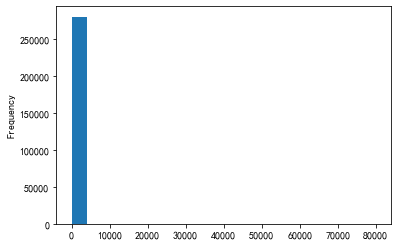

In [39]:
# 用户消费金额分布图
grouped_Customer.sum().BASK_SPEND.plot.hist(bins = 20)

可以看出用户消费金额大都集中在0-1000元以内,从上述直方图可以看出，用户消费金额，绝大部分是呈现集中趋势.

{'whiskers': [<matplotlib.lines.Line2D at 0x2241a20df08>,
 'caps': [<matplotlib.lines.Line2D at 0x22427622848>,
 'boxes': [<matplotlib.lines.Line2D at 0x2241a1d3bc8>],
 'medians': [<matplotlib.lines.Line2D at 0x224276267c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x22427626f88>],
 'means': []}

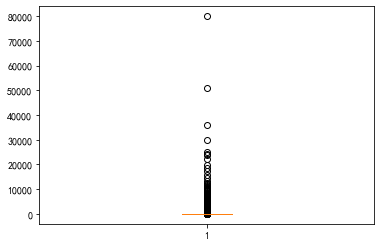

In [40]:
#使用 plt 的 .boxplot() 方法绘制箱线图
plt.figure()
plt.subplot()
plt.boxplot(df_basket["BASK_SPEND"])

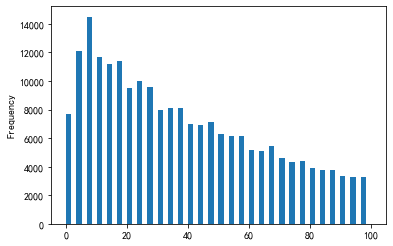

In [41]:
grouped_Customer.sum().query('BASK_SPEND < 100').BASK_SPEND.plot.hist(width=[1.7],bins = 30)

在0-100元的销售统计中，可以看出0-20元更为集中。

### 2.1.3 用户累计消费占比

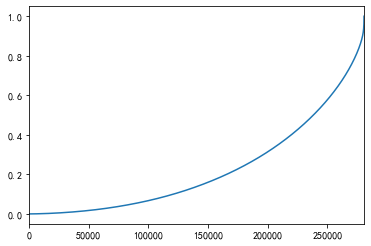

In [42]:
# 用户累计消费占比（百分之多少的用户占百分之多少的销售额）
grouped_Customer.sum().sort_values('BASK_SPEND').apply(lambda x : x.cumsum()/ x.sum()).reset_index().BASK_SPEND.plot()

按照用户消费金额进行升序排列，并进行累计求和，可以发现：50%的用户贡献了20%的消费额度，而排名前5000的用户就贡献了40%的消费额（曲线上升幅度最大的部分）.

### 2.1.4 购买时间分析

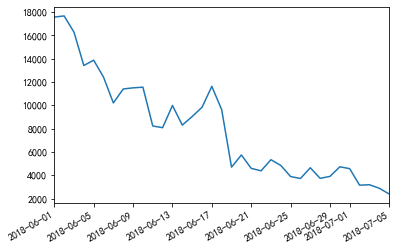

In [43]:
# 用户第一次消费（首购）
grouped_Customer.min().SHOP_DATETIME.value_counts().plot()

用户第一次购买时间，集中在统计周期的前几天，表明老用户占比较大。

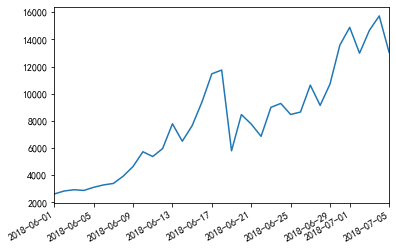

In [44]:
# 用户最后一次消费
grouped_Customer.max().SHOP_DATETIME.value_counts().plot()

用户最后一次购买的分布和用户第一次购买分布相反，大部分用户最后一次购买集中在最后一周，说明用户粘性较好。

### 新老用户消费比

([<matplotlib.patches.Wedge at 0x22433465d88>,
 [Text(-0.3521304189966928, 1.0421152373980593, 'False'),
  Text(0.35213051656656097, -1.042115204429226, 'True')],
 [Text(-0.19207113763455969, 0.5684264931262142, '60.37%'),
  Text(0.1920711908544878, -0.568426475143214, '39.63%')])

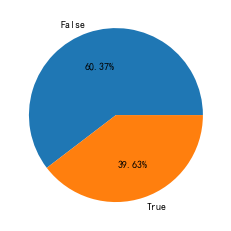

In [45]:
# 多少用户仅消费1次
user_life =grouped_Customer.SHOP_DATETIME.agg(['min','max'])
(user_life['min'] == user_life['max']).value_counts()
# 可视化（饼图）
plt.pie((user_life['min'] == user_life['max']).value_counts(normalize = True),
       autopct='%.2f%%',
       labels = (user_life['min'] == user_life['max']).value_counts().index)

## 2.2 RFM模型分析

### 2.2.1 用户分层 

In [46]:
# RFM用户分层
rfm = df_basket.pivot_table(index = 'BASK_CODE',
                    values = ['STORE_CODE','BASK_SPEND','SHOP_DATETIME'],
                    aggfunc= {'BASK_CODE':'count',
                             'BASK_SPEND':'sum',
                             'SHOP_DATETIME':'max'})

In [47]:
rfm.head()

,BASK_CODE,BASK_SPEND,SHOP_DATETIME
BASK_CODE,,,
961,1,25.0,2018-06-18
962,1,132.1,2018-06-18
964,1,28.0,2018-06-18
965,1,40.0,2018-06-18
966,1,12.5,2018-06-18


In [48]:
rfm['R'] = (rfm.SHOP_DATETIME.max() - rfm.SHOP_DATETIME) / np.timedelta64(1,'D')
rfm.rename(columns={'BASK_CODE':'F','BASK_SPEND':'M'},inplace = True)

In [49]:
rfm

,F,M,SHOP_DATETIME,R
BASK_CODE,,,,
961,1,25.0,2018-06-18,17.0
962,1,132.1,2018-06-18,17.0
964,1,28.0,2018-06-18,17.0
965,1,40.0,2018-06-18,17.0
966,1,12.5,2018-06-18,17.0
...,...,...,...,...
323910,1,9.0,2018-07-05,0.0
323911,1,17.4,2018-07-05,0.0
323912,1,5.9,2018-07-05,0.0


### 2.2.2建立RFM模型
+ R：recency最近一次消费时间，理论上R值越小，价值越高；
+ F：frequency最近一次消费频率，消费频率越高意味着这部分用户对产品的满意度越高，用户粘性比较好，忠诚度也高；
+ M：Montary最近一段时间消费的金额，符合二八原则

In [50]:
def rfm_func(x):
    level = x.apply(lambda x:'1' if x > 0 else '0')
    label = level.R +level.F + level.M
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'
    }
    result = d[label]
    return result
rfm['label'] = rfm[['R','F','M']].apply(lambda x : x - x.mean()).apply(rfm_func,axis=1)

In [51]:
rfm.groupby('label').sum()

,F,M,R
label,,,
一般价值客户,24142,390991.43,136245.0
一般保持客户,78408,1245849.52,121598.0
一般发展客户,117098,2568485.95,1965610.0
一般挽留客户,102901,2110018.61,393603.0
重要价值客户,36373,1951109.06,190993.0
重要保持客户,144084,7526893.87,188421.0
重要发展客户,34998,3760221.04,454196.0
重要挽留客户,31793,3000817.29,93646.0


In [52]:
rfm.groupby('label').count()

,F,M,SHOP_DATETIME,R
label,,,,
一般价值客户,7660,7660,7660,7660
一般保持客户,24357,24357,24357,24357
一般发展客户,89623,89623,89623,89623
一般挽留客户,69282,69282,69282,69282
重要价值客户,10875,10875,10875,10875
重要保持客户,39323,39323,39323,39323
重要发展客户,21908,21908,21908,21908
重要挽留客户,17788,17788,17788,17788


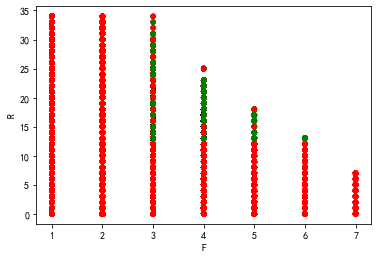

In [53]:
rfm.loc[rfm.label == '重要价值客户','color'] = 'g'
rfm.loc[rfm.label != '重要价值客户','color'] = 'r'
rfm.plot.scatter('F','R',c = rfm.color)

### 
由于统计周期短，用户购买频率较低，RFM分层结果不明确，无法明显看出用户分层。但重要保持用户可以看出为最大群体。

In [54]:
# 用户生命周期-新、老、活跃、回流、流失
df_basket['day'] = df_basket.SHOP_DATETIME.values.astype('datetime64[D]')
pivoted_counts = df_basket.pivot_table(index = 'BASK_CODE',
                               columns= 'day',
                               values= 'SHOP_DATETIME',
                               aggfunc= 'count').fillna(0)

In [55]:
pivoted_counts

day,2018-06-01,2018-06-02,2018-06-03,2018-06-04,2018-06-05,2018-06-06,2018-06-07,2018-06-08,2018-06-09,2018-06-10,...,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-06-30,2018-07-01,2018-07-02,2018-07-03,2018-07-04,2018-07-05
BASK_CODE,,,,,,,,,,,,,,,,,,,,,
961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
323911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
323912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
# 进行简化
df_purchase = pivoted_counts.applymap(lambda x : 1 if x>0 else 0)

In [57]:
df_purchase

day,2018-06-01,2018-06-02,2018-06-03,2018-06-04,2018-06-05,2018-06-06,2018-06-07,2018-06-08,2018-06-09,2018-06-10,...,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-06-30,2018-07-01,2018-07-02,2018-07-03,2018-07-04,2018-07-05
BASK_CODE,,,,,,,,,,,,,,,,,,,,,
961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
323911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
323912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
def active_statu(data):
    status = []
    for i in range(18):
        # 当月未消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        # 当月有消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
                    
    return status

purshase_stats = df_purchase.apply(active_statu,axis=1)
purshase_stats = pd.DataFrame(purshase_stats)[0].apply(pd.Series)
#purshase_stats.columns = pivoted_counts.columns

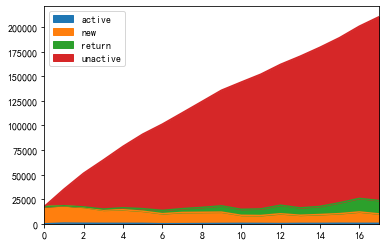

In [59]:
purshase_stats_ct = purshase_stats.replace('unreg',np.NAN).apply(lambda x : pd.value_counts(x))
purshase_stats_ct.fillna(0).T.plot.area()

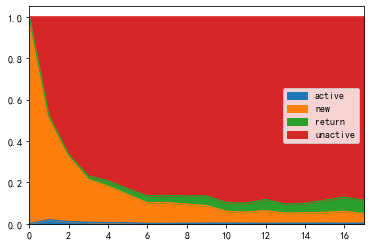

In [60]:
purshase_stats_ct.fillna(0).T.apply(lambda x : x/x.sum(),axis = 1)
purshase_stats_ct.fillna(0).T.apply(lambda x : x/x.sum(),axis = 1).plot.area()

由于统计时间段较短，用户购买频率较低，在此模型中大多为不活跃用户

### 2.2.3 用户购买周期

In [61]:
# 用户订单周期
order_diff = grouped_Customer.apply(lambda x: x.SHOP_DATETIME - x.SHOP_DATETIME.shift())

In [62]:
order_diff

BASK_CODE        
961        532549   NaT
962        102862   NaT
964        459649   NaT
965        245315   NaT
966        174729   NaT
                     ..
323910     354287   NaT
323911     140049   NaT
323912     496861   NaT
323913     354291   NaT
323914     139598   NaT
Name: SHOP_DATETIME, Length: 569797, dtype: timedelta64[ns]

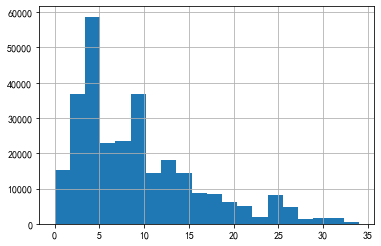

In [63]:
(order_diff/np.timedelta64(1,'D')).hist(bins=20)

In [64]:
#查看生命周期描述统计
(user_life['max'] - user_life['min']).describe()

count                     280816
mean      9 days 11:41:53.292689
std      10 days 02:22:16.746182
min              0 days 00:00:00
25%              0 days 00:00:00
50%              7 days 00:00:00
75%             17 days 00:00:00
max             34 days 00:00:00
dtype: object

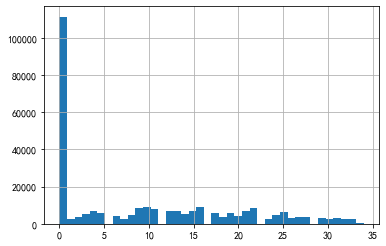

In [65]:
((user_life['max'] - user_life['min'])/np.timedelta64(1,'D')).hist(bins = 40)

通过对用户购买周期进行分析，可以看出

### 2.2.4 用户复购率和留存率

In [66]:
purchase_r = pivoted_counts.applymap(lambda x : 1 if x > 1 else np.NAN if x == 0 else 0 )

In [67]:
purchase_r

day,2018-06-01,2018-06-02,2018-06-03,2018-06-04,2018-06-05,2018-06-06,2018-06-07,2018-06-08,2018-06-09,2018-06-10,...,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-06-30,2018-07-01,2018-07-02,2018-07-03,2018-07-04,2018-07-05
BASK_CODE,,,,,,,,,,,,,,,,,,,,,
961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
323911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
323912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


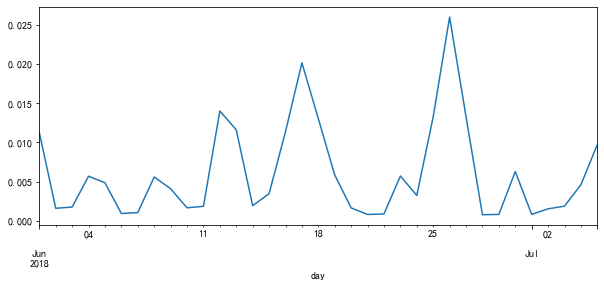

In [68]:
(purchase_r.sum() / purchase_r.count()).plot(figsize = (10,4))

### 2.2.5 回购率

In [69]:
def purchase_back(data):
    status = []
    for i in range(17):
        if data[i] ==1:
            if data[i+1] == 1 :
                status.append(1)
            if data[i+1] == 0 :
                status.append(0)
        else:
            status.append(np.NAN)
    status.append(np.NAN)
    return status

purchase_b = df_purchase.apply(purchase_back,axis=1)
purchase_b = pd.DataFrame(purchase_b)[0].apply(pd.Series)
#purchase_b.columns = pivoted_counts.columns

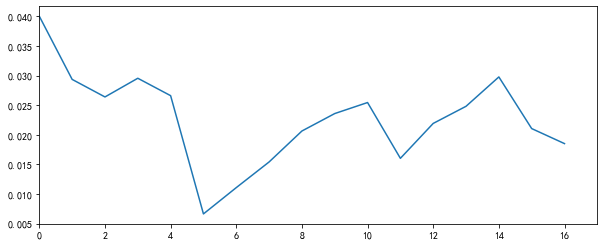

In [70]:
(purchase_b.sum()/purchase_b.count()).plot(figsize = (10,4))

#### 通过对用户数据分析:
* 按照用户消费金额进行升序排列，并进行累计求和，可以发现：50%的用户贡献了20%的消费额度，而排名前5000的用户就贡献了40%的消费额（曲线上升幅度最大的部分）.
* 通过计算用户的购买频率，形成购买频率客户数图，经过分析用户购买频率分为1-6次，在统计期间购买2-3次的人数最多，分别为188802人次和167914人次。
* 通过购买频率分组平均消费金额的图像，可以看出购买频率为1-5次的客户的平均消费金额差距不大，都为39元左右。消费频率最高的6次的用户，平均消费额与前几个分组频率有着明显区别，为36.499元，可能与用户的购买频率较高有关联。
* 通过客户购买人数的日期分布来看，六月平均购买人数为16431人，七月为15468人，这与七月这五天为周一至周五工作日有关，并不能说明人流量出现明显下滑，其中六月16、17、18三天的流量情况异常突出，星期分别为星期六、星期日、星期一，可能又相关促销行动举行，可在商品分析时，进一步分析。但19日也就是周二的时候出现了较大的人流量下滑，活动过后的人流量下滑问题可进一步思考，提出对应策略分析解决。
* 用户复购率呈现出周期性变化，复购率呈现先下降后上升趋势
* RFM模型用户分类较为单一，由于统计时间段较短，用户购买频率较低，在此模型中大多为不活跃用户

# 3 商品情况分析

## 3.1 销售统计
### 3.1.1 销售量前十统计

In [71]:
productId_count = df_item.groupby('PROD_CODE')['BASK_CODE'].count().sort_values(ascending=False)
print(productId_count.head(10))

PROD_CODE
205540    12617
21835     10455
194690     9530
72811      7744
178462     7372
197532     7287
205437     6721
1557       6036
109584     5932
216571     5673
Name: BASK_CODE, dtype: int64


### 3.1.2 销售额前十统计

In [109]:
productId_amount = df_item.groupby('PROD_CODE').sum()['ITEM_SPEND'].sort_values(ascending=False)
print(productId_amount.head(10))

PROD_CODE
7137      405783.50
7133      289784.00
136839    281211.40
149413    173820.33
1239      149153.20
154900    141034.70
220834    127622.90
21835     114483.25
88160     103467.20
3971       84972.00
Name: ITEM_SPEND, dtype: float64


### 两个前十榜单差距较大

### 3.2 折扣与销售量情况

In [73]:
discount_category=df_item.groupby(['DISCOUNT_TYPE']).sum()[['ITEM_SPEND']]
discount_category.sort_values('ITEM_SPEND',ascending=False,inplace=True)
discount_category['cum_percent']=discount_category['ITEM_SPEND'].cumsum()/discount_category['ITEM_SPEND'].sum()
discount_category.reset_index()

,DISCOUNT_TYPE,ITEM_SPEND,cum_percent
0,n,1.468634e+07,0.651152
1,p,5.355779e+06,0.888613
2,m,2.155000e+06,0.984160
3,v,1.910762e+05,0.992632
4,x,9.161940e+04,0.996694
5,q,4.618240e+04,0.998741
6,Z,2.479515e+04,0.999841
7,s,3.573290e+03,0.999999
8,h,2.150000e+01,1.000000


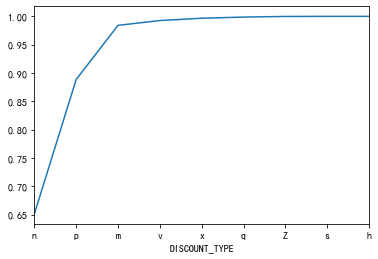

In [108]:
discount_category['cum_percent'].plot()

#### n,p,m三种折扣类型占据了99%以上的销售额

## 3.3 相关性分析 

### 3.1.1 折扣种类关联性分析
独热向量编码

In [90]:
col=["DISCOUNT_TYPE"]
dummy_type=pd.get_dummies(df_item,columns=col)

In [91]:
dummy_type

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT,price,DISCOUNT_TYPE_Z,DISCOUNT_TYPE_h,DISCOUNT_TYPE_m,DISCOUNT_TYPE_n,DISCOUNT_TYPE_p,DISCOUNT_TYPE_q,DISCOUNT_TYPE_s,DISCOUNT_TYPE_v,DISCOUNT_TYPE_x
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,-0.3,1.0,0,0,1,0,0,0,0,0,0
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,0.0,3.0,0,0,1,0,0,0,0,0,0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,-6.9,1.0,0,0,0,0,1,0,0,0,0
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,0.0,1.0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732756,2018-07-05,A010,2,284254,144474,0.470,26.32,56.0,0.0,NaN,0,0,0,1,0,0,0,0,0
1732757,2018-07-05,A010,2,284265,2243,24.000,43.20,1.8,0.0,NaN,0,0,0,1,0,0,0,0,0
1732758,2018-07-05,A010,2,284406,216571,1.000,14.50,14.5,0.0,NaN,0,0,0,1,0,0,0,0,0
1732759,2018-07-05,A010,2,284266,223768,1.000,2.50,3.0,-0.5,NaN,0,0,1,0,0,0,0,0,0


In [92]:
colums=['STORE_CODE','BASK_CODE','PROD_CODE']#去除无数量意义的编码
dummy_type=dummy_type.drop(colums,axis=1)

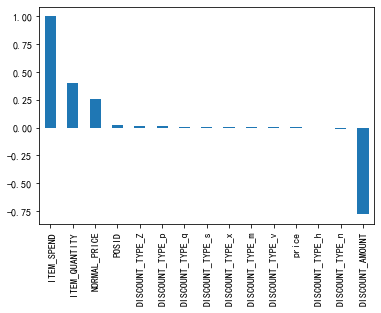

In [93]:
#  相关性分析 剔除相关性较低的特征
plt.rcParams["font.sans-serif"]=['SimHei']#用来正常显示中文标签  
plt.rcParams["axes.unicode_minus"]=False#用来正常显示负号
plt.figure()
dummy_type.corr()['ITEM_SPEND'].sort_values(ascending=False).plot(kind='bar')
plt.show()

通过相关性分析可以看出，商品折后价格和打折价格呈现负相关，出现商品价格越高降价幅度越大的现象，与事实相符。而商品价格和商品计量单位和正常价格呈现正相关。商品价格与折扣种类没有明显相关关系。

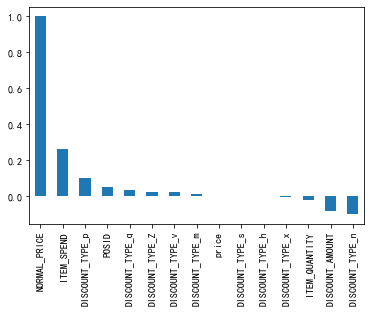

In [94]:
#  相关性分析 剔除相关性较低的特征
plt.rcParams["font.sans-serif"]=['SimHei']#用来正常显示中文标签  
plt.rcParams["axes.unicode_minus"]=False#用来正常显示负号
plt.figure()
dummy_type.corr()['NORMAL_PRICE'].sort_values(ascending=False).plot(kind='bar')
plt.show()

通过相关性分析可以看出，商品正常价格与商品折后价格有一定联系，可以理解为打折幅度有限，商品正常价格与商品折后价格仍有很大关联性，与事实相符。
商品正常价格与折扣种类p和n还有微弱的相关性。

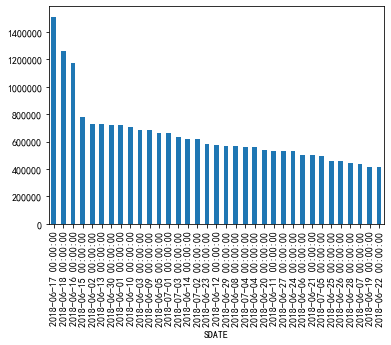

In [95]:
# 相关性分析 剔除相关性较低的特征
plt.rcParams["font.sans-serif"]=['SimHei']#用来正常显示中文标签  
plt.rcParams["axes.unicode_minus"]=False#用来正常显示负号
plt.figure()
a=dummy_type.groupby('SDATE').sum()['ITEM_SPEND'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [96]:
a=df_item.groupby('PROD_CODE').sum()[['ITEM_SPEND','ITEM_QUANTITY']]#.plot(kind='bar')
b=df_item.groupby('PROD_CODE').count()['DISCOUNT_TYPE']#.plot(kind='bar')
#a=df_item[['PROD_CODE','ITEM_SPEND','ITEM_QUANTITY']].sum().sort_values(ascending=False).groupby('PROD_CODE').plot(kind='bar')

# grouped_Customer = df_basket[['BASK_CODE','SHOP_DATETIME', 
#           'BASK_SPEND']].sort_values(['SHOP_DATETIME']).groupby('BASK_CODE')

In [97]:
b

PROD_CODE
19         13
31        141
33         15
36         52
39         83
         ... 
224973      1
224993      1
225009      1
225046      6
225047      1
Name: DISCOUNT_TYPE, Length: 19248, dtype: int64

In [98]:
c=pd.concat([a,b],axis=1)

In [99]:
c=pd.DataFrame(a,b)

In [100]:
c = pd.DataFrame(c,columns = ['DISCOUNT_TYPE','ITEM_SPEND','ITEM_QUANTITY'])

In [101]:
c.index

Int64Index([ 13, 141,  15,  52,  83,  10,  81, 236,  83,  10,
            ...
             11,   3,  37,  23,  21,   1,   1,   1,   6,   1],
           dtype='int64', name='DISCOUNT_TYPE', length=19248)

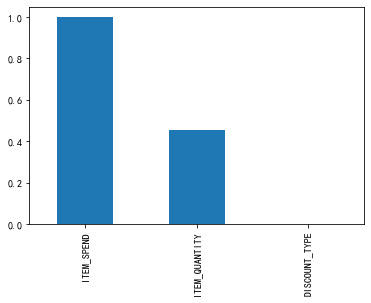

In [102]:
c.corr()['ITEM_SPEND'].sort_values(ascending=False).plot(kind='bar')

通过对商品折后价格总计，以及商品销售量总计，折扣种类总计进行相关性分析，发现三者有着很强的关联性。

### 3.1.2 店铺关联性分析

In [103]:
col=["STORE_CODE"]
dummy_store=pd.get_dummies(df_item,columns=col)
dummy_store

,SDATE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT,price,...,STORE_CODE_A022,STORE_CODE_D002,STORE_CODE_D003,STORE_CODE_D004,STORE_CODE_D005,STORE_CODE_D006,STORE_CODE_D007,STORE_CODE_D008,STORE_CODE_D009,STORE_CODE_D010
0,2018-06-01,3,250451,29405,1.000,1.70,2.0,m,-0.3,1.0,...,0,0,0,0,0,0,1,0,0,0
1,2018-06-01,3,250451,13187,1.000,1.00,1.0,n,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,2018-06-01,3,250243,196249,1.000,99.00,99.0,m,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
3,2018-06-01,3,250243,199637,1.000,9.90,16.8,p,-6.9,1.0,...,0,0,0,0,0,0,1,0,0,0
4,2018-06-01,1,160905,195012,3.222,18.69,5.8,n,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732756,2018-07-05,2,284254,144474,0.470,26.32,56.0,n,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1732757,2018-07-05,2,284265,2243,24.000,43.20,1.8,n,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1732758,2018-07-05,2,284406,216571,1.000,14.50,14.5,n,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1732759,2018-07-05,2,284266,223768,1.000,2.50,3.0,m,-0.5,NaN,...,0,0,0,0,0,0,0,0,0,0


In [104]:
colums=['SDATE','BASK_CODE','PROD_CODE']#去除无数量意义的编码
dummy_store=dummy_store.drop(colums,axis=1)

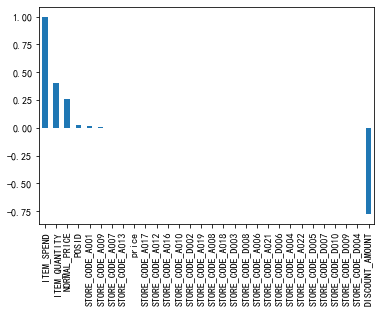

In [105]:
#  相关性分析 剔除相关性较低的特征
plt.rcParams["font.sans-serif"]=['SimHei']#用来正常显示中文标签  
plt.rcParams["axes.unicode_minus"]=False#用来正常显示负号
plt.figure()
dummy_store.corr()['ITEM_SPEND'].sort_values(ascending=False).plot(kind='bar')
plt.show()

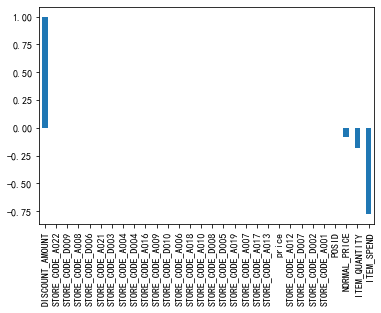

In [106]:
#  相关性分析 剔除相关性较低的特征
plt.rcParams["font.sans-serif"]=['SimHei']#用来正常显示中文标签  
plt.rcParams["axes.unicode_minus"]=False#用来正常显示负号
plt.figure()
dummy_store.corr()['DISCOUNT_AMOUNT'].sort_values(ascending=False).plot(kind='bar')
plt.show()

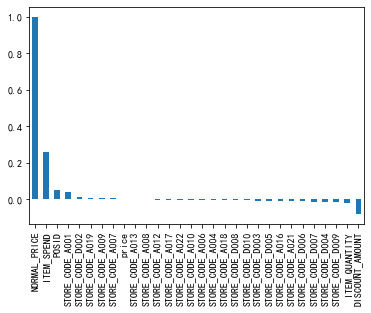

In [107]:
#  相关性分析 剔除相关性较低的特征
plt.rcParams["font.sans-serif"]=['SimHei']#用来正常显示中文标签  
plt.rcParams["axes.unicode_minus"]=False#用来正常显示负号
plt.figure()
dummy_store.corr()['NORMAL_PRICE'].sort_values(ascending=False).plot(kind='bar')
plt.show()

从以上几个图可以看出，价格方面与店铺方面关联性不明显，说明店铺间价格基本保持一致。

#### 小结：
* 关联性分析中需要先对数据进行独热向量编码后再分析
* 销售量前十与销售额前十榜单差距巨大，仅有编号为21835的商品在两份榜单都在前十，看来均匀销量与销售额往往是不能兼得的
* n,p,m三种折扣类型占据了99%以上的销售额，其中n类型大概占据了60%
* 通过相关性分析可以看出，商品折后价格和打折价格呈现负相关，出现商品价格越高降价幅度越大的现象，与事实相符。而商品价格和商品计量单位和正常价格呈现正相关。商品价格与折扣种类没有明显相关关系。
* 通过对商品折后价格总计，以及商品销售量总计，折扣种类总计进行相关性分析，发现三者有着很强的关联性。
* 通过对店铺与价格关联性分析上看，价格方面与店铺方面关联性不明显，说明店铺间价格基本保持一致。